# Linear Regression Assignment

### In this assignment will do end to end linear regression project to predict car prices. Data and Data Dictionary is given along with the Jupyter notebook

#### Steps Involved 

    Data Importing and Understanding
        Data Inspection
    
    Data Cleaning
        Delete useless columns
        Delete all Unique columns
        Impute missing values
        
    Data Visualization
        Plot distribution graphs for numerical data
        plot categorical data
        
    Data analysis
        Univariate Analysis
        Bivariate Analysis
        Create heatmaps and pairplots
        
    Understanding Business insights
        find some business related insights
        
    Data preprocessing
        Labelencoding,One hot encoding if needed
        Standardization, normalization if needed
        
    Feature Engineering
        Recursive feature elimination (use statsmodels)
        check Variance Inflation factor
        
    Creating Model and training model
        Split data into two parts (Train and Test)
        Use sklearn library
        
    Validate your model with right metrics
        R2 score is used for final grading
    
### Target Variable is car price in the data

## Rubrics:
    * Each section will fetch 10 marks
    * 10 Marks is for commenting code properly
    * more than 0.80 R2score will fetch good marks (Test set)
    * Submit assignment in time
  

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

## Data Importing and Understanding

In [7]:
car = pd.read_csv('car_price.csv')

In [8]:
print(car.shape)
print()
print(car.info())

(205, 26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null   

# Data Cleaning

In [9]:
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


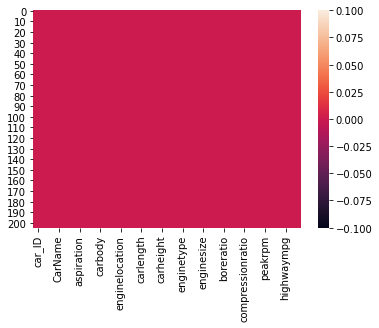

In [10]:
sns.heatmap(car.isnull())

In [11]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
#handling duplicates
car[car.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


# Data Visualization

### for numerical data

scatter plot to show how the price of sedan cars varies with respect to its engine size


Text(0, 0.5, 'price')

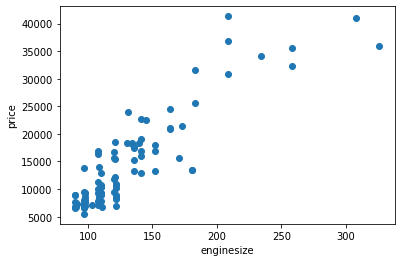

In [13]:
#scatter plot
c= car[car.carbody=='sedan']
print("scatter plot to show how the price of sedan cars varies with respect to its engine size")
x= c.enginesize
y= c.price
plt.scatter(x,y)
plt.xlabel('enginesize')
plt.ylabel('price')

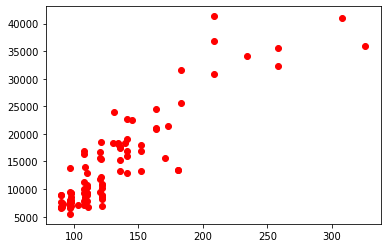

In [14]:
#similar to scatterplot using plt.plot
plt.plot(x,y,'ro')

shows different representation


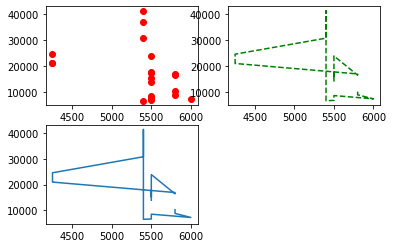

In [15]:
#creating sub plots

print('shows different representation')
c= c.head(20)
x= c.peakrpm
y= c.price
plt.subplot(2,2,1)
plt.plot(x,y,'ro')
plt.subplot(2,2,2)
plt.plot(x,y,'g--')
plt.subplot(2,2,3)
plt.plot(x,y)

<BarContainer object of 205 artists>

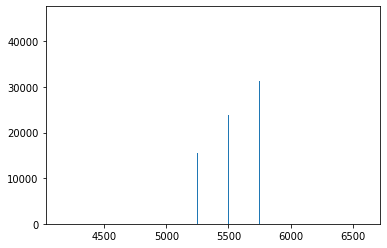

In [16]:
x= car.peakrpm
y= car.price
plt.bar(x,y)

#### for categorical data

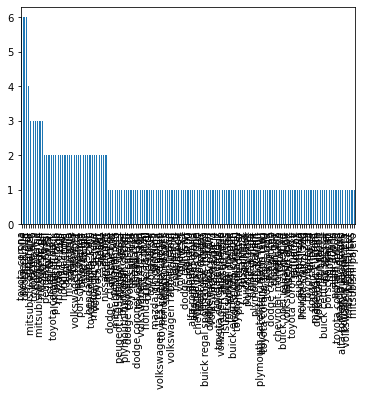

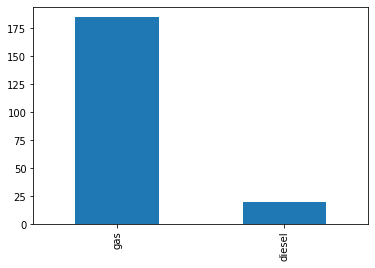

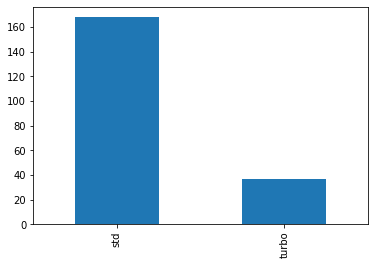

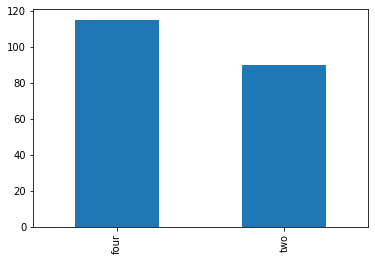

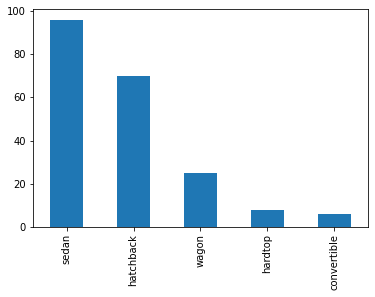

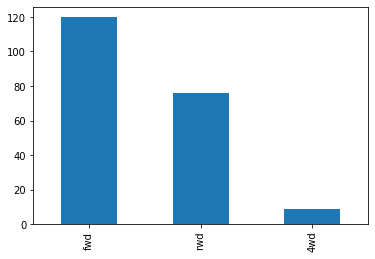

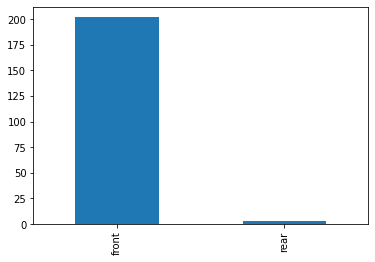

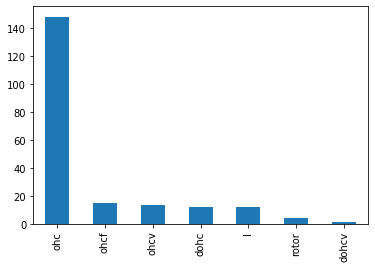

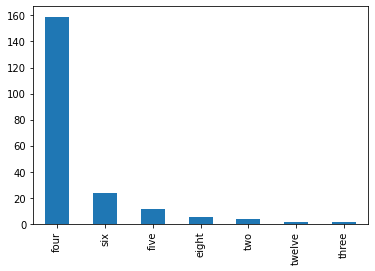

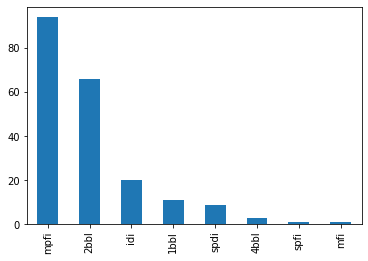

In [17]:
col = [i for i in car.columns if car[i].dtype=='O']
for i in col:
        car[i].value_counts().plot(kind='bar')
        plt.show()

# Data analysis

#### Univariate Analysis

In [21]:
car_gas = car.loc[car['fueltype']=='gas']
car_diesel = car.loc[car['fueltype']=='diesel']

lets look at variation of price using univariete plot based on fuel type


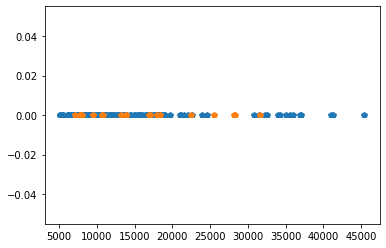

In [19]:
print('lets look at variation of price using univariete plot based on fuel type')
plt.plot(car_gas['price'],np.zeros_like(car_gas['price']), 'p')
plt.plot(car_diesel['price'],np.zeros_like(car_diesel['fuelsystem']), 'p')
plt.show()

['car_ID', 'symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


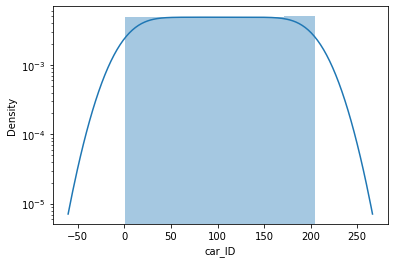

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


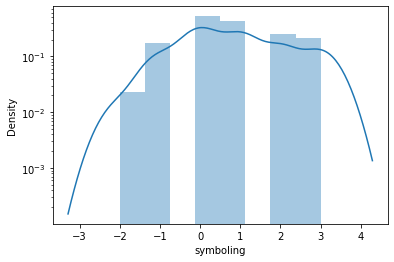

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


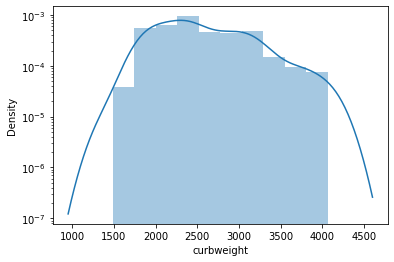

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


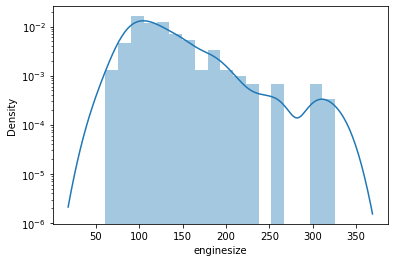

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


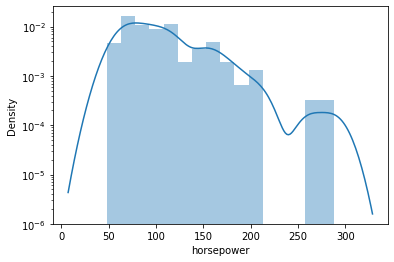

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


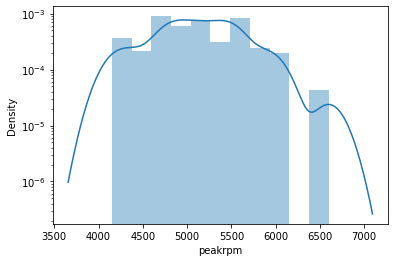

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


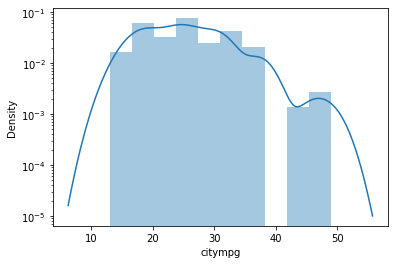

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


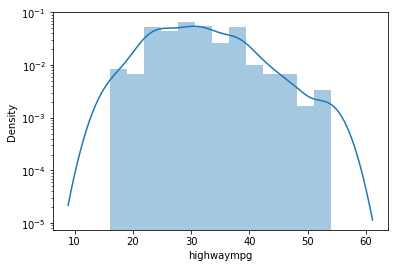

In [20]:
int_col = [i for i in car.columns if car[i].dtype == 'int64']
print(int_col)
for i in int_col:
    sns.distplot(car[i])
    plt.yscale('log')
    plt.show()
    print()
    print()    

#### Bivariate Analysis

variation of aspiration using bivariete plot based on fuelsystem and fueltype


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


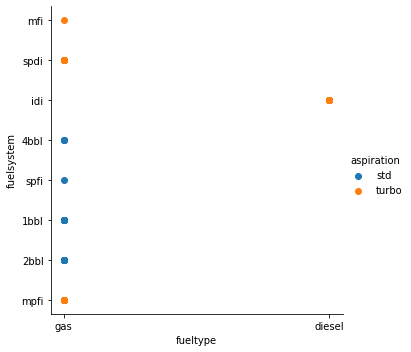

In [26]:
print("variation of aspiration using bivariete plot based on fuelsystem and fueltype")
sns.FacetGrid(car,hue="aspiration",size=5).map(plt.scatter,"fueltype","fuelsystem").add_legend()
plt.show()

variation of price using bivariete plot based on fuelsystem and fueltype


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


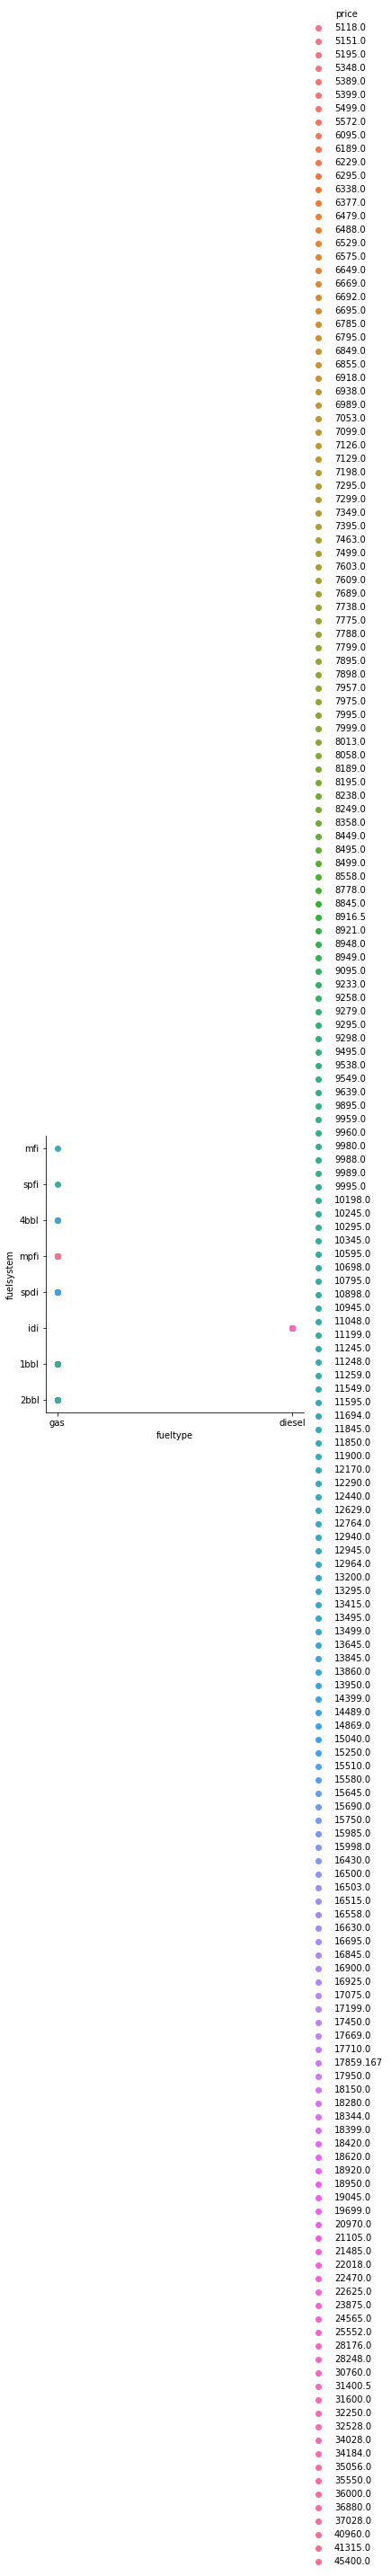

In [27]:
print("variation of price using bivariete plot based on fuelsystem and fueltype")
sns.FacetGrid(car,hue="price",size=5).map(plt.scatter,"fueltype","fuelsystem").add_legend()
plt.show()

#### pairplots/Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


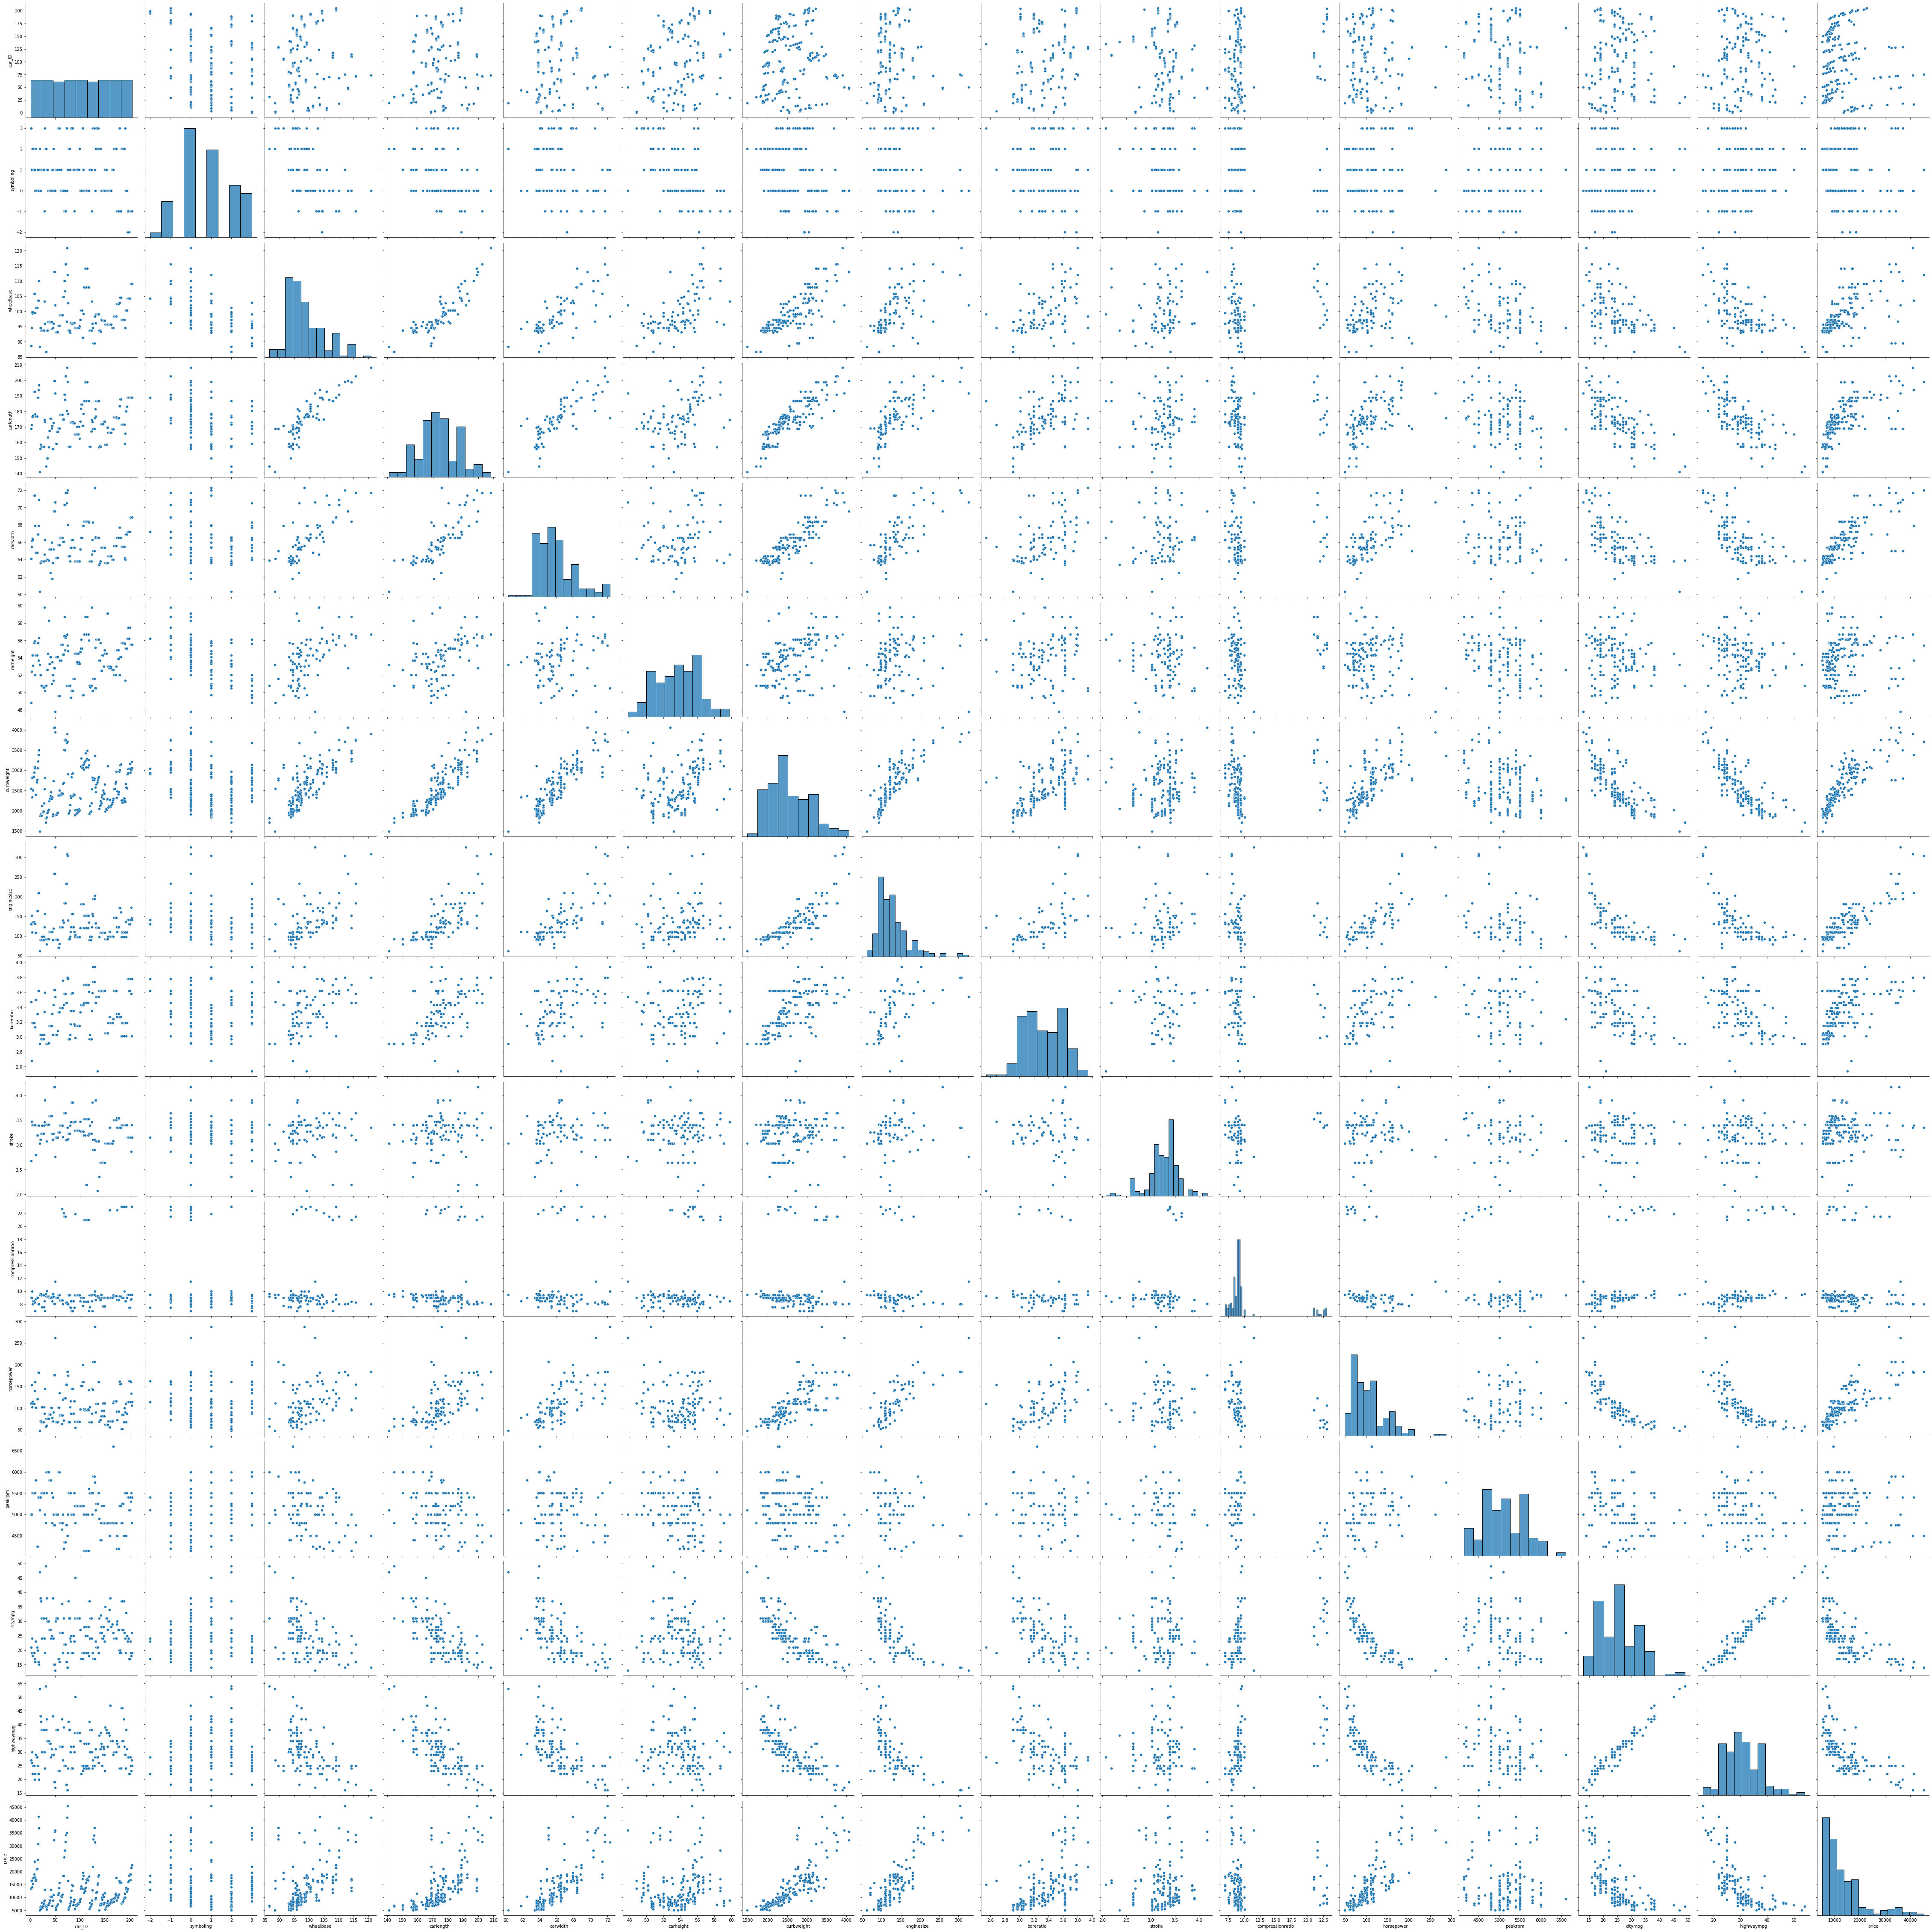

In [24]:
sns.pairplot(car,size=4)

                    car_ID  symboling  ...  highwaympg     price
car_ID            1.000000  -0.151621  ...    0.011255 -0.109093
symboling        -0.151621   1.000000  ...    0.034606 -0.079978
wheelbase         0.129729  -0.531954  ...   -0.544082  0.577816
carlength         0.170636  -0.357612  ...   -0.704662  0.682920
carwidth          0.052387  -0.232919  ...   -0.677218  0.759325
carheight         0.255960  -0.541038  ...   -0.107358  0.119336
curbweight        0.071962  -0.227691  ...   -0.797465  0.835305
enginesize       -0.033930  -0.105790  ...   -0.677470  0.874145
boreratio         0.260064  -0.130051  ...   -0.587012  0.553173
stroke           -0.160824  -0.008735  ...   -0.043931  0.079443
compressionratio  0.150276  -0.178515  ...    0.265201  0.067984
horsepower       -0.015006   0.070873  ...   -0.770544  0.808139
peakrpm          -0.203789   0.273606  ...   -0.054275 -0.085267
citympg           0.015940  -0.035823  ...    0.971337 -0.685751
highwaympg        0.01125

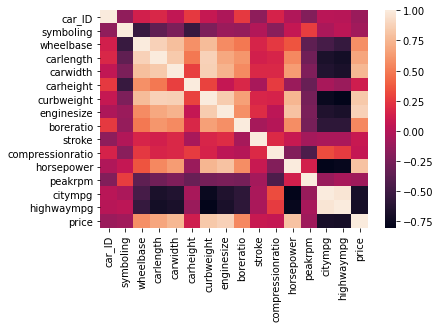

In [28]:
data = car.corr()
print(data)

sns.heatmap(data)
plt.show()

# Understanding Business insights

count of cars with different car bodies


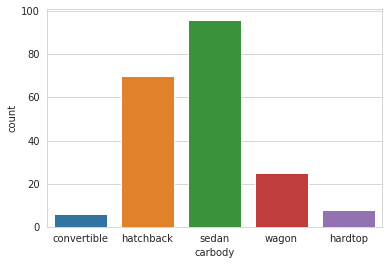

In [29]:
print('count of cars with different car bodies')
sns.set_style('whitegrid')
sns.countplot(x='carbody',data=car)

count of cars with different car bodies based on fuel type


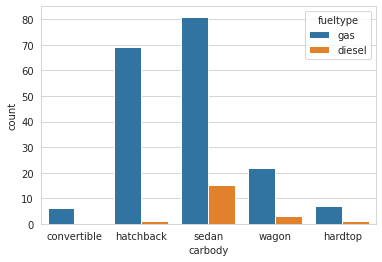

In [30]:
print('count of cars with different car bodies based on fuel type')

sns.set_style('whitegrid')
sns.countplot(x='carbody',hue='fueltype',data=car)

In [31]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data preprocessing

OneHotEncoding

In [32]:
car_df = pd.get_dummies(car,drop_first=True)
car_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
x= car_df.drop('price',axis=1)

In [34]:
y= car_df.price

Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [36]:
X = ss.fit_transform(x)

In [37]:
from sklearn import preprocessing
from sklearn import utils

In [38]:
enc = preprocessing.LabelEncoder()
y_encoded = enc.fit_transform(y)

print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(y_encoded))

continuous
multiclass
multiclass


## Feature Engineering

# Creating Model and training model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y_encoded)  #splitting training and testing set 

In [41]:
log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
prediction=log.predict(x_test)

# Validating model with right metrics

In [43]:
from sklearn.metrics import r2_score
R2_score=r2_score(y_test,prediction)
print("r2 score for final grading is ", R2_score)

r2 score for final grading is  0.7647116271980815
